<a href="https://colab.research.google.com/github/SanthoshNagaraj94/industrial_automation_energy_effecency/blob/main/energy_efficiency_iNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEATING AND COOLING LOAD OF RESIDENTIAL BUILDING WALL PREDICTION**





Importing Necessary Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_theme(style="whitegrid")


Reading the DataSet using Pandas

In [ ]:
data=pd.read_excel('/content/ENB2012_data.xlsx')

From The DataSet we observed that this is and MultiVarient Output Regression 

In [ ]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
len(data['Y1'].unique())

587

In [ ]:
data['X2'].unique()

array([514.5, 563.5, 588. , 612.5, 637. , 661.5, 686. , 710.5, 735. ,
       759.5, 784. , 808.5])

Remove the Output Y1 and Y2 from the data 

In [ ]:
x=data.drop(['Y1','Y2'],axis=1)

In [ ]:
x

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [ ]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Check the null value in the DataSet

In [ ]:
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

Identify the outliers in the DataSet by using BoxPlot

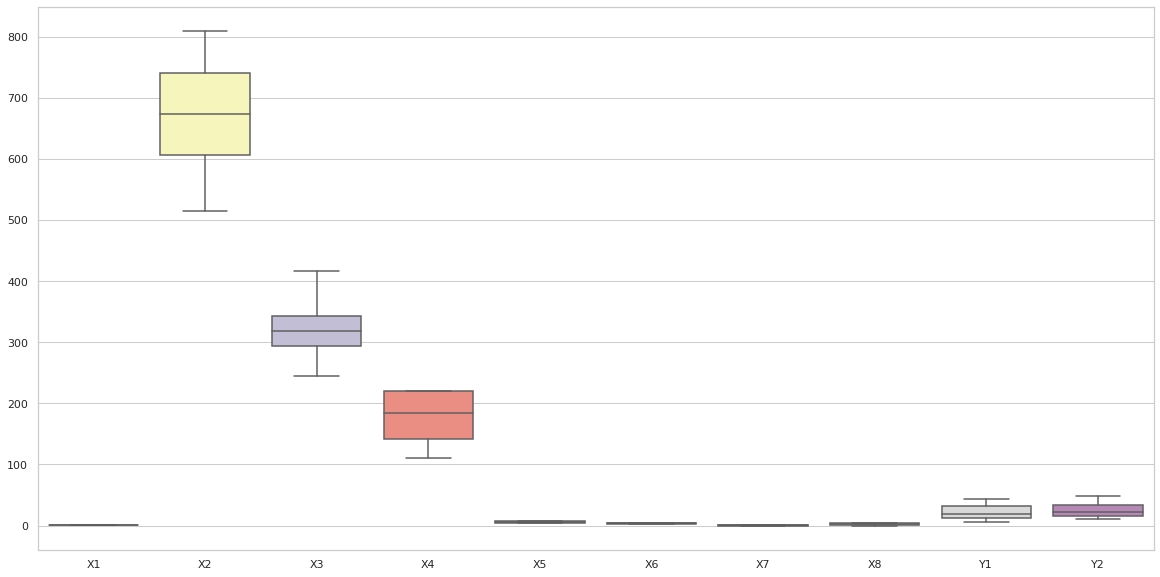

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data, orient="v", palette="Set3")
plt.show()

Using the pairplot to find the relationship of each features with the target outputs

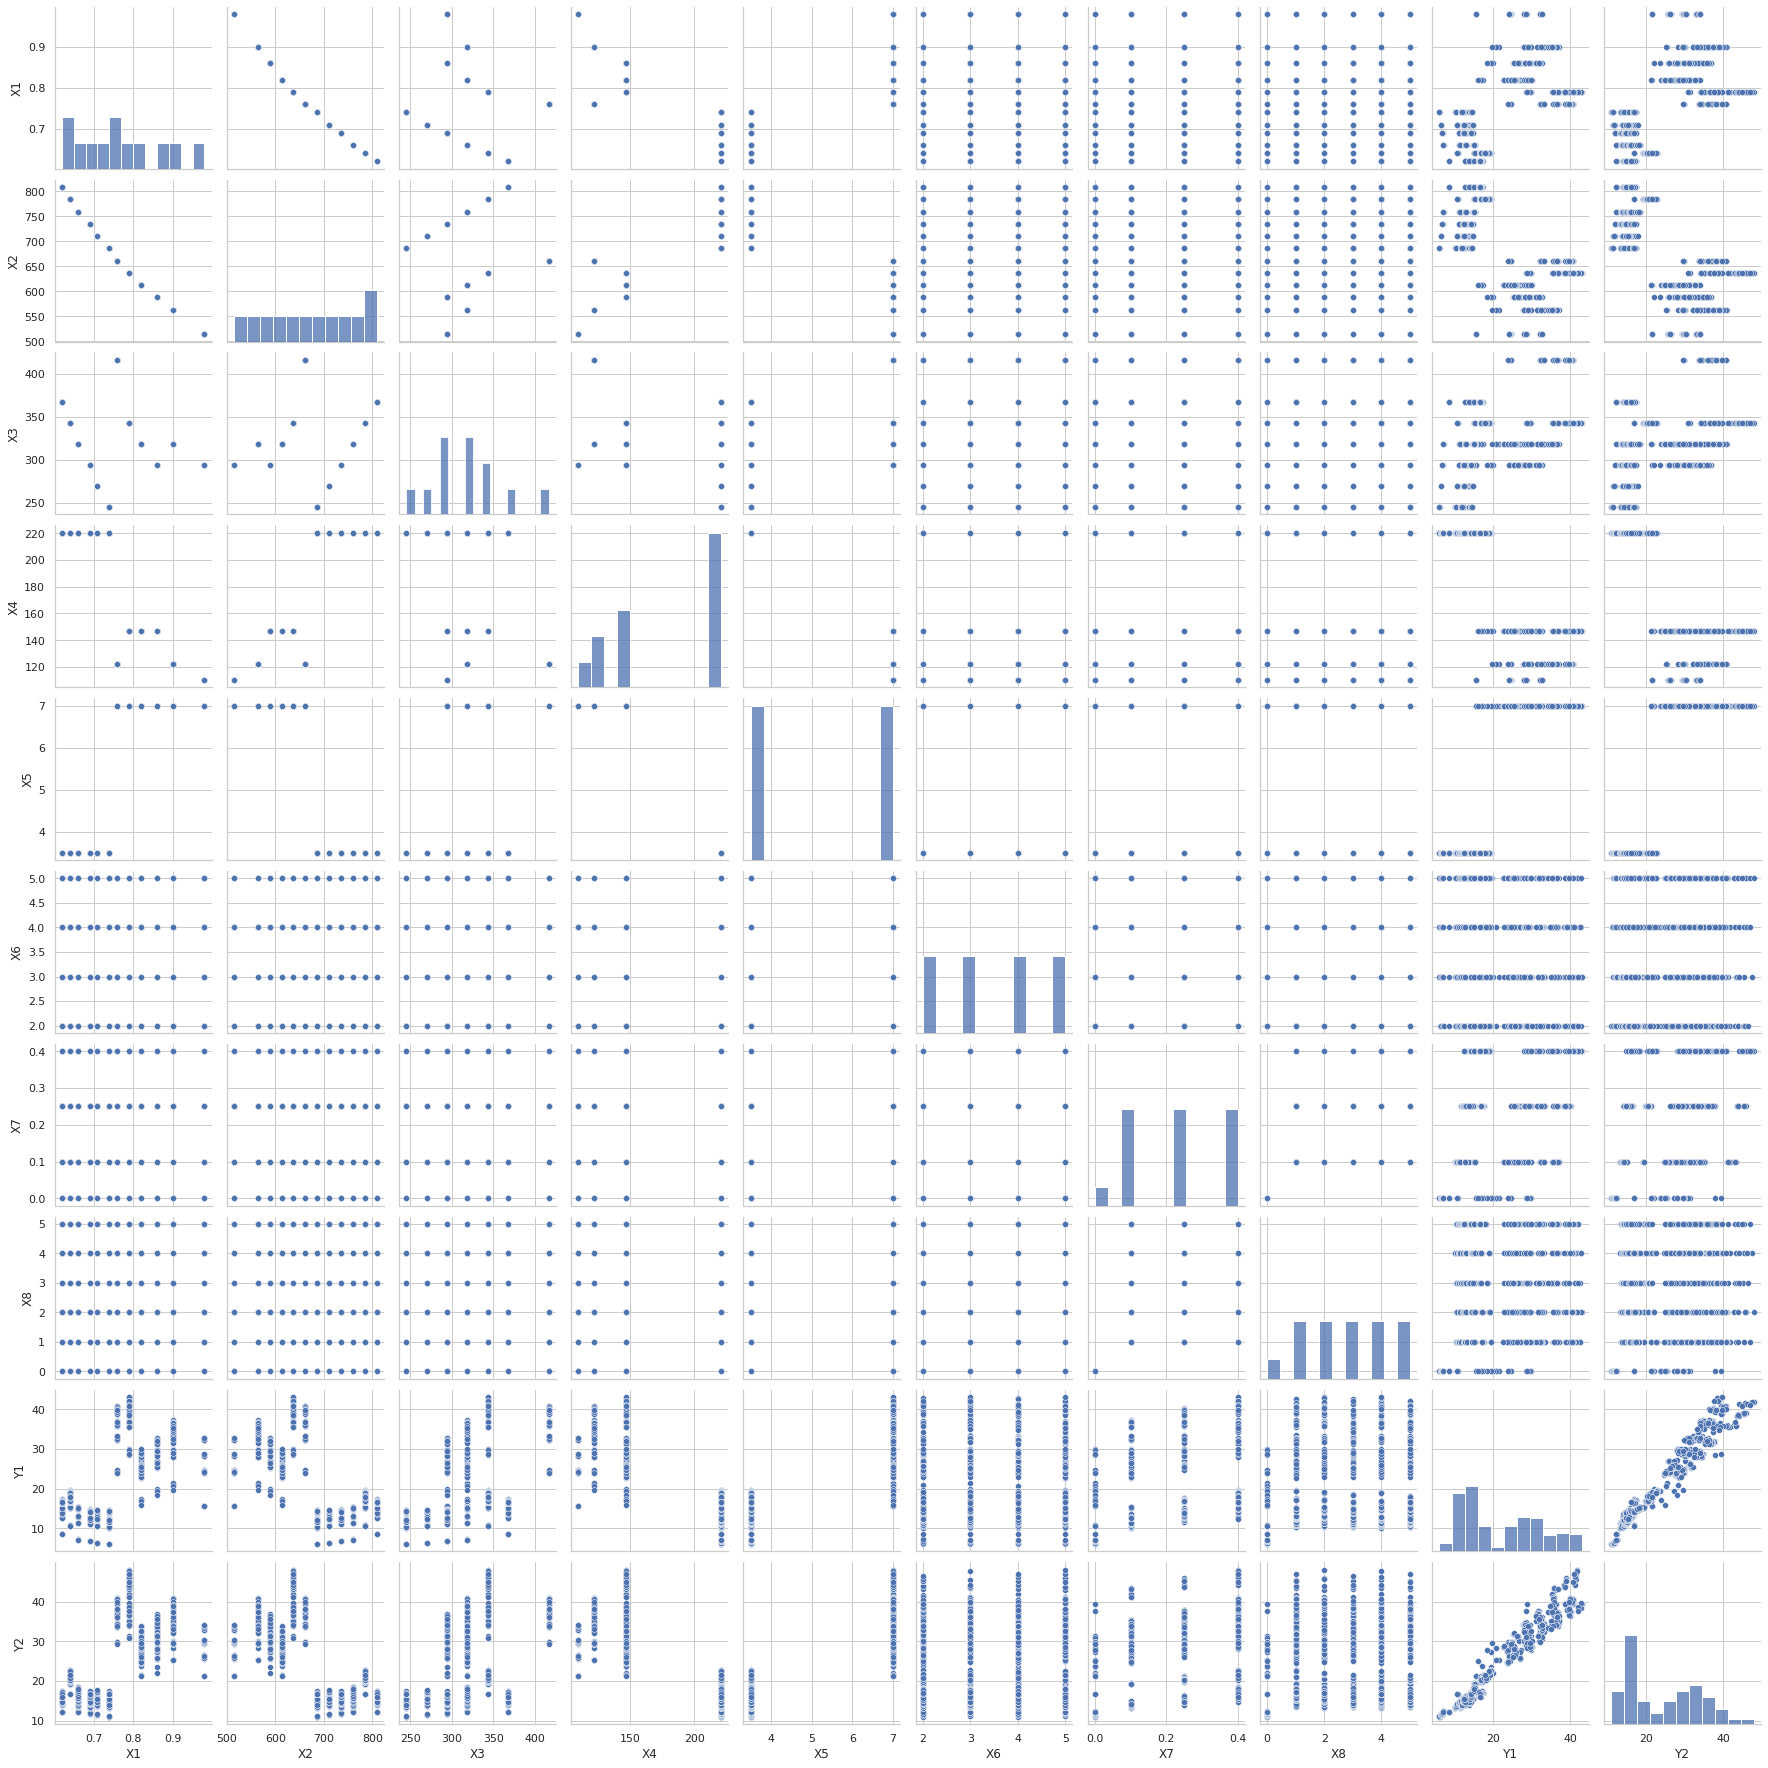

In [ ]:
sns.pairplot(data)

assign Y1 and Y2 as target as y

In [ ]:
y=data[['Y1','Y2']]

In [ ]:
y

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
...,...,...
763,17.88,21.40
764,16.54,16.88
765,16.44,17.11
766,16.48,16.61


Importing the

> RandomForest Regressor 


> MultiOutput Regressor





In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

from sklearn.model_selection import train_test_split

Splitting the training and testing Data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=42)

Using MinMax scaler to Normalize the data to e in equal level

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_train=scale.fit_transform(x_train)

Initiating Multioutput regressor with RandomForest Regressor model with the paramenters

In [ ]:
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=30,
                                                          random_state=0))

Fit the Multioutput regressor with RandomForest Regressor model

In [ ]:
regr_multirf.fit(x_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=30,
                                                     random_state=0))

Initiating only with RandomForest Regressor model with the paramenters

In [ ]:
regr_rf = RandomForestRegressor(n_estimators=100, max_depth=15,
                                random_state=2)
regr_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, random_state=2)

In [ ]:
x_test=scale.transform(x_test)

In [ ]:
y_multirf = regr_multirf.predict(x_test)
y_rf = regr_rf.predict(x_test)

Initiating the Validation Library

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from numpy import absolute


Validating the MultioutRegressor with Randomfrorest Regressor using K-Fold Cross validation

In [ ]:

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(regr_multirf, scale.transform(x), y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 0.661 (0.093)


Validating the Randomfrorest Regressor using K-Fold Cross validation

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(regr_rf, scale.transform(x), y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 0.710 (0.104)


In [ ]:
regr_rf.predict(x_train[0:1])

array([[23.6432, 26.825 ]])

In [ ]:
regr_rf.predict(data.loc[0:0,'X1':'X8'])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[22.7184, 29.3275]])

Randomforest regressor score

In [ ]:
regr_rf.score(x_test,y_test)*100

97.87178454943233

Multiple Output Regressor with randomforest regressor score

In [ ]:
regr_multirf.score(x_test,y_test)*100


98.167563701092

In [ ]:
pre=regr_multirf.predict(scale.transform(x))

In [ ]:
pre=pd.DataFrame(pre)

In [ ]:
pre.to_excel("total.xls")

Initiating the Libriary for make the model into pickel file for the deployment

In [56]:
import pickle
model=regr_multirf
scale=scale

In [63]:
model_name='model.pkl'
scale_name='scale.pkl'

model = open(model_name,'wb')
pickle.dump(model_name,model)
scale = open(scale_name,'wb')
pickle.dump(scale_name,scale)

model.close()
scale.close()